In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [25]:
df = pd.read_csv("ex2data1.csv", header=0, names = ["Exam1", "Exam2", "Admitted"]) #0 allows to skip first row as col names

In [26]:
df.head()

,Exam1,Exam2,Admitted
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [46]:
df.shape

(99, 3)

In [56]:
df.Admitted.value_counts()

Admitted
1    60
0    39
Name: count, dtype: int64

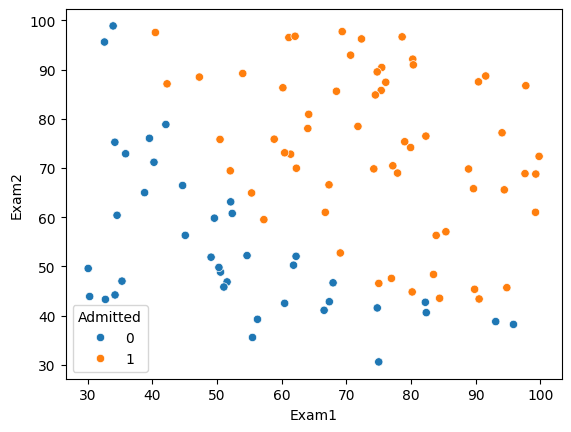

In [27]:
sns.scatterplot(x=df.Exam1, y=df.Exam2, hue=df.Admitted)
plt.show()

In [28]:
X = df.drop('Admitted', axis=1)
y = df.Admitted

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
pred_proba = logreg.predict_proba(x_test) #probability of correct prediction
logreg.score(x_test,y_test) #accuracy

0.8666666666666667

In [45]:
#Evaluation
confusion_matrix(y_test,y_pred)

array([[ 9,  2],
       [ 2, 17]])

In [55]:
classification_report(y_test,y_pred, labels =[0,1])

'              precision    recall  f1-score   support\n\n           0       0.82      0.82      0.82        11\n           1       0.89      0.89      0.89        19\n\n    accuracy                           0.87        30\n   macro avg       0.86      0.86      0.86        30\nweighted avg       0.87      0.87      0.87        30\n'

Conclusion: Accuracy is decent but with some tweeking, it could maybe be imporved. Generally, the dataset is too small for a reasonable ml model to function well. Confusion matrix shows that there is a low number in false positives and false negatives, which is very nice. Precision, recall and f1-score performed better for group 1 than group 0. This is likely because group 1 was represented almost with double the amount of data (60 vs 40). It would be important to balance out the data before training the model.
